In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [42]:
from pandas_datareader import data as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import psycopg2

In [43]:
start = datetime.datetime(2001,1,1)
end = datetime.datetime(2001,12,31)

In [44]:
# Store filepath in a variable
stocks = "../resources/enron_stock_data.csv"


In [5]:
# Read our Data file with the pandas library1
stocks_df = pd.read_csv(stocks)
stocks_df

,date,open,high,low,close,volume
0,1998-01-02 00:00:00,20.72,20.78,20.19,20.38,646600
1,1998-01-05 00:00:00,20.28,20.60,19.82,20.00,985400
2,1998-01-06 00:00:00,19.75,19.85,19.07,19.38,2035500
3,1998-01-07 00:00:00,19.25,19.50,19.10,19.50,1680800
4,1998-01-08 00:00:00,19.50,19.50,19.10,19.25,1141700
...,...,...,...,...,...,...
1003,2001-12-24 00:00:00,0.60,0.65,0.57,0.65,32034600
1004,2001-12-26 00:00:00,0.67,0.74,0.65,0.65,32034600
1005,2001-12-27 00:00:00,0.66,0.68,0.56,0.60,26312100
1006,2001-12-28 00:00:00,0.60,0.61,0.56,0.60,18229800


In [6]:
stocks_df.to_csv('stocks.csv', index=False)


In [7]:
plt.rcParams['figure.figsize'] = (15,7)

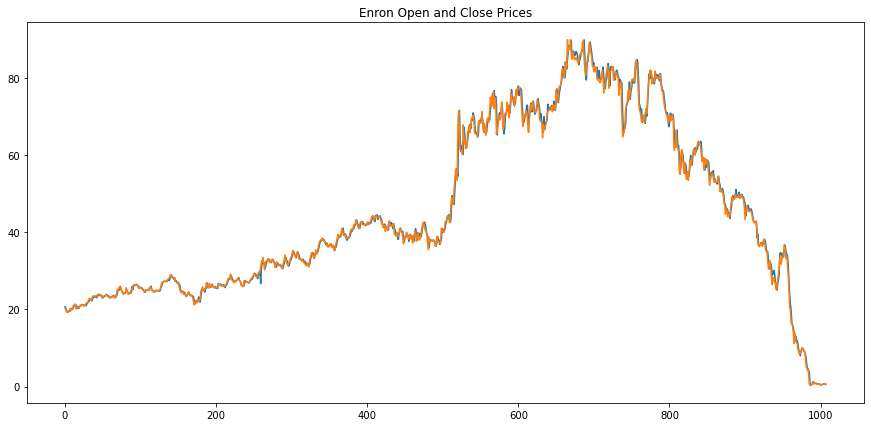

<Figure size 1080x504 with 0 Axes>

In [40]:
stocks_df.set_index('date')
stocks_df['open'].plot(label = "Open Price")
stocks_df['close'].plot(label = "Close Price")
plt.title('Enron Open and Close Prices')
plt.figure(figsize=(15,7))
plt.show()

open_points = stocks_df['open']
date_points = stocks_df['date']
plt.title('Enron open prices 1998 - 2001')
plt.plot(date_points, open_points)
plt.show()

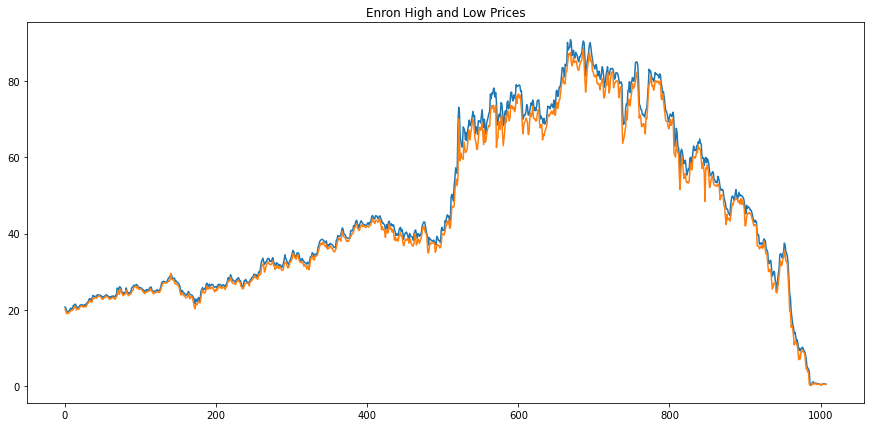

<Figure size 1080x504 with 0 Axes>

In [34]:
stocks_df.set_index('date')
stocks_df['high'].plot(label = "High Price")
stocks_df['low'].plot(label = "Low Price")
plt.title('Enron High and Low Prices')
plt.figure(figsize=(15,7))
plt.show()

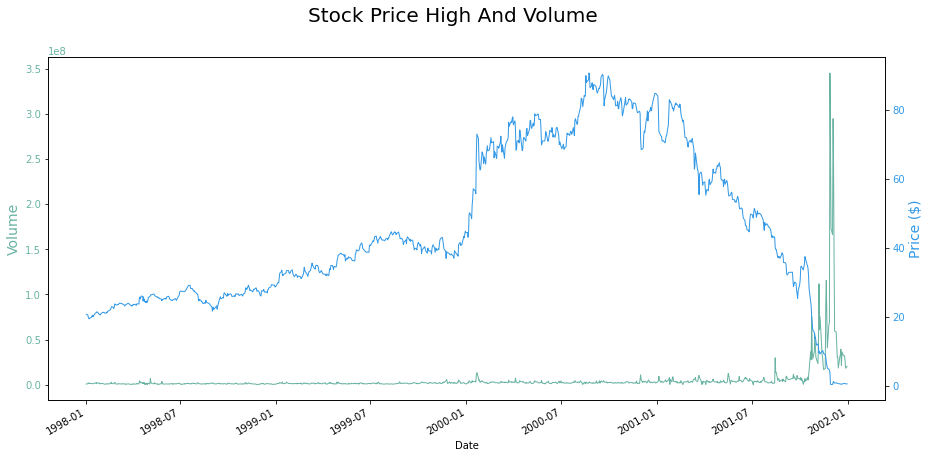

In [39]:
COLOR_VOLUME = "#69b3a2"
COLOR_PRICE = "#3399e6"

fig, ax1 = plt.subplots(figsize=(15, 7))
ax2 = ax1.twinx()

ax1.plot(stocks_df['date'], stocks_df['volume'], color=COLOR_VOLUME, lw=1)
ax2.plot(stocks_df['date'], stocks_df['high'], color=COLOR_PRICE, lw=1)

ax1.set_xlabel("Date")
ax1.set_ylabel("Volume", color=COLOR_VOLUME, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_VOLUME)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Stock Price High And Volume", fontsize=20)
fig.autofmt_xdate()

In [ ]:
# 1999 to mid-2001: Enron executives and directors receive $1.1 billion by selling 17.3 million shares.

# April 17, 2001: Enron reports first quarter profits of $536 million.

# August 14, 2001: Jeffrey K. Skilling abruptly resigns as chief executive, citing “personal reasons,” Mr. Lay reassume the position of CEO.
# August 20, 2001: Kenneth Lay sells 93,000 shares for about $2 million. At the same time, he urges employees to buy company shares, sends an e-mail to employees assuring them that the company is on solid footing, and predicts "significantly higher stock price.”

# September 26, 2001: In an online chat with employees, Mr. Lay says that Enron stock is a good buy and that the company’s accounting methods are “legal and totally appropriate.”

# October 16, 2001: Enron reports a third-quarter loss of $618 million.

# October 22, 2001: The Securities and Exchange Commission opens an inquiry into Enron’s accounting.

# December 2, 2001: Enron files for bankruptcy protection.

In [12]:
stocks_df['high'].argmax()

669

In [13]:
stocks_df.iloc[[stocks_df['high'].argmax()]]

,date,open,high,low,close,volume
669,2000-08-23 00:00:00,87.5,90.75,87.31,90.0,2664100


In [14]:
stocks_df['low'].argmin()

987

In [15]:
stocks_df.iloc[[stocks_df['low'].argmin()]]

,date,open,high,low,close,volume
987,2001-11-30 00:00:00,0.37,0.38,0.25,0.26,173598200


In [16]:
start_1 = datetime.datetime(2001,1,1)
end_1 = datetime.datetime(2001,12,31)

In [17]:
stocks_df['date']

0       1998-01-02 00:00:00
1       1998-01-05 00:00:00
2       1998-01-06 00:00:00
3       1998-01-07 00:00:00
4       1998-01-08 00:00:00
               ...         
1003    2001-12-24 00:00:00
1004    2001-12-26 00:00:00
1005    2001-12-27 00:00:00
1006    2001-12-28 00:00:00
1007    2001-12-31 00:00:00
Name: date, Length: 1008, dtype: object

In [18]:
stocks_df["date"] = pd.to_datetime(stocks_df["date"])

In [19]:
stocks_df

,date,open,high,low,close,volume
0,1998-01-02,20.72,20.78,20.19,20.38,646600
1,1998-01-05,20.28,20.60,19.82,20.00,985400
2,1998-01-06,19.75,19.85,19.07,19.38,2035500
3,1998-01-07,19.25,19.50,19.10,19.50,1680800
4,1998-01-08,19.50,19.50,19.10,19.25,1141700
...,...,...,...,...,...,...
1003,2001-12-24,0.60,0.65,0.57,0.65,32034600
1004,2001-12-26,0.67,0.74,0.65,0.65,32034600
1005,2001-12-27,0.66,0.68,0.56,0.60,26312100
1006,2001-12-28,0.60,0.61,0.56,0.60,18229800


In [20]:
stocks_df.set_index("date").head(4)


,open,high,low,close,volume
date,,,,,
1998-01-02,20.72,20.78,20.19,20.38,646600
1998-01-05,20.28,20.60,19.82,20.00,985400
1998-01-06,19.75,19.85,19.07,19.38,2035500
1998-01-07,19.25,19.50,19.10,19.50,1680800


In [21]:
stocks_2001 = stocks_df[stocks_df["date"].between('2001-1-1', '2001-12-31')]
stocks_2001

,date,open,high,low,close,volume
758,2001-01-02,84.00,84.06,79.06,79.88,3229800
759,2001-01-03,79.88,80.25,75.00,75.06,4236100
760,2001-01-04,73.38,73.81,70.19,72.00,9174200
761,2001-01-05,72.75,73.50,71.00,71.38,5072700
762,2001-01-08,71.38,72.50,70.38,70.25,2457800
...,...,...,...,...,...,...
1003,2001-12-24,0.60,0.65,0.57,0.65,32034600
1004,2001-12-26,0.67,0.74,0.65,0.65,32034600
1005,2001-12-27,0.66,0.68,0.56,0.60,26312100
1006,2001-12-28,0.60,0.61,0.56,0.60,18229800


In [22]:
stocks_2001.set_index("date").head(4)

,open,high,low,close,volume
date,,,,,
2001-01-02,84.00,84.06,79.06,79.88,3229800
2001-01-03,79.88,80.25,75.00,75.06,4236100
2001-01-04,73.38,73.81,70.19,72.00,9174200
2001-01-05,72.75,73.50,71.00,71.38,5072700


Enron Stock Data Year 2001

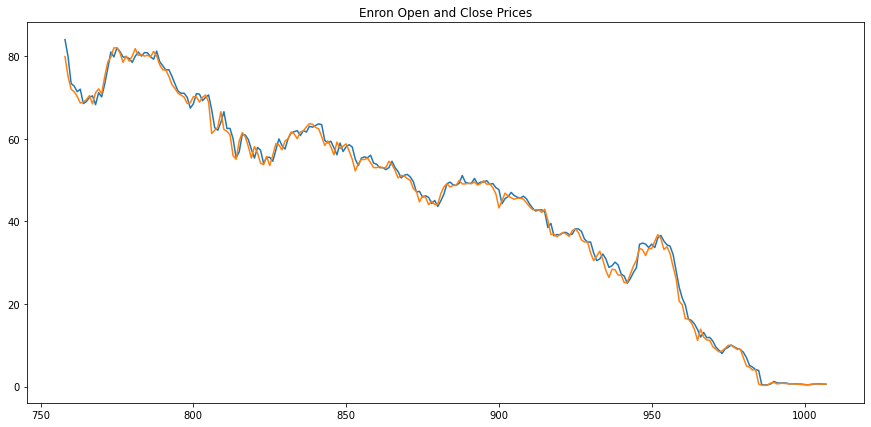

<Figure size 1080x504 with 0 Axes>

In [23]:
stocks_2001['open'].plot(label = "Open Price")
stocks_2001['close'].plot(label = "Close Price")
plt.title('Enron Open and Close Prices')
plt.figure(figsize=(15,7))
plt.show()

In [24]:
stocks_2000_2001 = stocks_df[stocks_df["date"].between('2000-1-1', '2001-12-31')]
stocks_2000_2001

,date,open,high,low,close,volume
508,2000-01-03,44.56,44.56,43.44,43.44,1770200
509,2000-01-04,43.06,43.13,41.38,42.50,2253700
510,2000-01-05,42.63,44.00,41.56,43.88,1793100
511,2000-01-06,44.00,49.63,43.75,47.94,4350500
512,2000-01-07,49.50,50.25,47.19,49.06,3567100
...,...,...,...,...,...,...
1003,2001-12-24,0.60,0.65,0.57,0.65,32034600
1004,2001-12-26,0.67,0.74,0.65,0.65,32034600
1005,2001-12-27,0.66,0.68,0.56,0.60,26312100
1006,2001-12-28,0.60,0.61,0.56,0.60,18229800


In [25]:
stocks_2000_2001.set_index("date").head(4)

,open,high,low,close,volume
date,,,,,
2000-01-03,44.56,44.56,43.44,43.44,1770200
2000-01-04,43.06,43.13,41.38,42.50,2253700
2000-01-05,42.63,44.00,41.56,43.88,1793100
2000-01-06,44.00,49.63,43.75,47.94,4350500


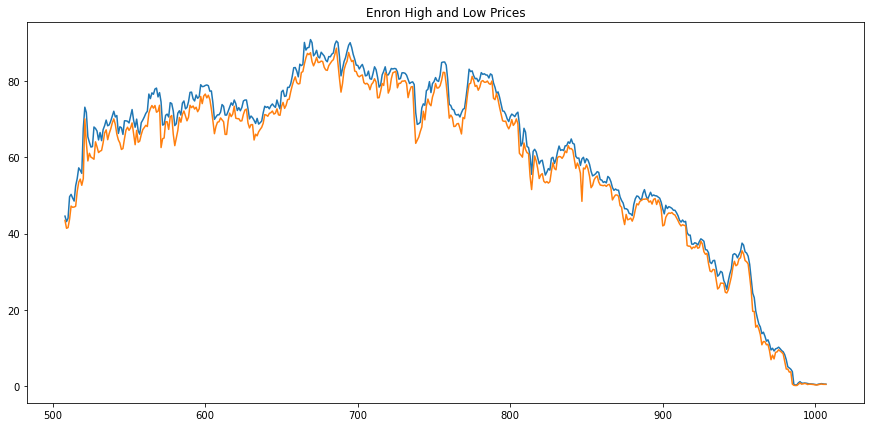

<Figure size 1080x504 with 0 Axes>

In [26]:
stocks_2000_2001['high'].plot()
stocks_2000_2001['low'].plot()
#stocks_2000_2001['volume'].plot()
plt.title('Enron High and Low Prices')
plt.figure(figsize=(15,7))
plt.show()

In [61]:
engine = psycopg2.connect(
                     host = "database-1.cartuziufdwi.us-east-1.rds.amazonaws.com",
                     database = "postgres",
                     user = "postgres",
                     password = "password1!",
                     port = "5432" )

In [62]:
cur = engine.cursor()
cur.execute("SELECT * FROM enron_emails WHERE date BETWEEN DATE('2000-08-20') AND DATE('2000-08-25') AND (to_ = 'sherri.sera@enron.com' OR from_ = 'sherri.sera@enron.com')")
data = cur.fetchall()
emails_df = pd.DataFrame(data)
engine.close()

In [63]:
emails_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,<20571927.1075846170417.JavaMail.evans@thyme>,2000-08-24,sherri.sera@enron.com,"steven.kean@enron.com, mark.palmer@enron.com, ...",JKS bio,\Steven_Kean_Dec2000_1\Notes Folders\All docum...,KEAN-S,skean.nsf,Attached is the bio I've been using for Jeff f...,182,0,0
1,<19044311.1075840072628.JavaMail.evans@thyme>,2000-08-21,sherri.sera@enron.com,johnathan_dazey@gensler.com,"Re: Seal PT ""enlistees""",\Jeffrey_Skilling_Dec2000\Notes Folders\All do...,SKILLING-J,jskillin.nsf,Please note changes below for Jeff and Jeffrey...,1709,1,0
2,<2019307.1075840072651.JavaMail.evans@thyme>,2000-08-23,sherri.sera@enron.com,johnathan_dazey@gensler.com,Re: Bootcamp Class #64,\Jeffrey_Skilling_Dec2000\Notes Folders\All do...,SKILLING-J,jskillin.nsf,"Johnathan,\n\nMy name is Sherri Sera, and I wo...",498,1,0


In [64]:
engine = psycopg2.connect(
                     host = "database-1.cartuziufdwi.us-east-1.rds.amazonaws.com",
                     database = "postgres",
                     user = "postgres",
                     password = "password1!",
                     port = "5432" )

In [65]:
cur = engine.cursor()
cur.execute("SELECT * FROM enron_emails WHERE date = DATE('2001-08-14')")
data = cur.fetchall()
emails_df = pd.DataFrame(data)
engine.close()

In [66]:
emails_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,<15357492.1075858634251.JavaMail.evans@thyme>,2001-08-14,msimpkins@winstead.com,"pallen@enron.com, pallen70@hotmail.com",Special Warranty Deed/First Amendment to Contr...,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...",Allen-P,PALLEN (Non-Privileged).pst,"Phillip,\n\nI spoke to Wendy this morning who ...",1139,0,0
1,<12689825.1075858634282.JavaMail.evans@thyme>,2001-08-14,msimpkins@winstead.com,k..allen@enron.com,RE: Special Warranty Deed/First Amendment to C...,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...",Allen-P,PALLEN (Non-Privileged).pst,"Thanks, Phillip. I should have the Reimbursem...",3441,0,0
2,<5926435.1075858634304.JavaMail.evans@thyme>,2001-08-14,msimpkins@winstead.com,"pallen@enron.com, pallen70@hotmail.com",Reimbursement Agreement,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Del...",Allen-P,PALLEN (Non-Privileged).pst,"<<3_6X01!.DOC>>\nPhillip,\n\nEnclosed is the ...",486,0,0
3,<25066167.1075858642267.JavaMail.evans@thyme>,2001-08-14,k..allen@enron.com,jean.mrha@enron.com,None,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"Jean,\n\nPlease have Melissa send down the CD ...",102,0,0
4,<11189648.1075858642290.JavaMail.evans@thyme>,2001-08-14,k..allen@enron.com,"kirk.mcdaniel@enron.com, h..lewis@enron.com",RE: Basic Risk Management (BRM) Simulation Dea...,"\PALLEN (Non-Privileged)\Allen, Phillip K.\Sen...",Allen-P,PALLEN (Non-Privileged).pst,"Kirk,\n\nAndy Lewis, a director on the Central...",2848,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,<7959438.1075863301877.JavaMail.evans@thyme>,2001-08-14,stanley.cocke@enron.com,shift.dl-portland@enron.com,Delano Buy-Back Strategy,"\Williams III, Bill (Non-Privileged)\Bill Will...",Williams-B,"Williams III, Bill (Non-Privileged).pst","Gentlemen,\n\nDelano has informed me that they...",263,0,0
421,<12689643.1075839999764.JavaMail.evans@thyme>,2001-08-14,bill.williams@enron.com,kate.symes@enron.com,Floor Protocol,"\ExMerge - Williams III, Bill\Sent Items",WILLIAMS-W3,None,"Group,\n\nRecently there have been complaints ...",563,0,0
422,<2870450.1075839999792.JavaMail.evans@thyme>,2001-08-14,bill.williams@enron.com,kate.symes@enron.com,FW: Power Trading 101: Tricks of the trade,"\ExMerge - Williams III, Bill\Sent Items",WILLIAMS-W3,None,Journalism?\nPretty big Enron influence in thi...,13258,0,0
423,<6637010.1075839999712.JavaMail.evans@thyme>,2001-08-14,bill.williams@enron.com,kate.symes@enron.com,RE: A few reminders....,"\ExMerge - Williams III, Bill\Sent Items",WILLIAMS-W3,None,\n\n -----Original Message-----\nFrom: \tSymes...,1825,0,0


In [70]:
engine = psycopg2.connect(
                     host = "database-1.cartuziufdwi.us-east-1.rds.amazonaws.com",
                     database = "postgres",
                     user = "postgres",
                     password = "password1!",
                     port = "5432" )

In [71]:
cur = engine.cursor()
cur.execute("SELECT date, COUNT(*) FROM enron_emails WHERE date BETWEEN DATE('2001-01-01') AND DATE('2001-12-31') GROUP BY date")
data = cur.fetchall()
emails_df = pd.DataFrame(data)
engine.close()

In [72]:
emails_df

,0,1
0,2001-01-01,31
1,2001-01-02,287
2,2001-01-03,311
3,2001-01-04,280
4,2001-01-05,289
...,...,...
360,2001-12-27,529
361,2001-12-28,476
362,2001-12-29,168
363,2001-12-30,126


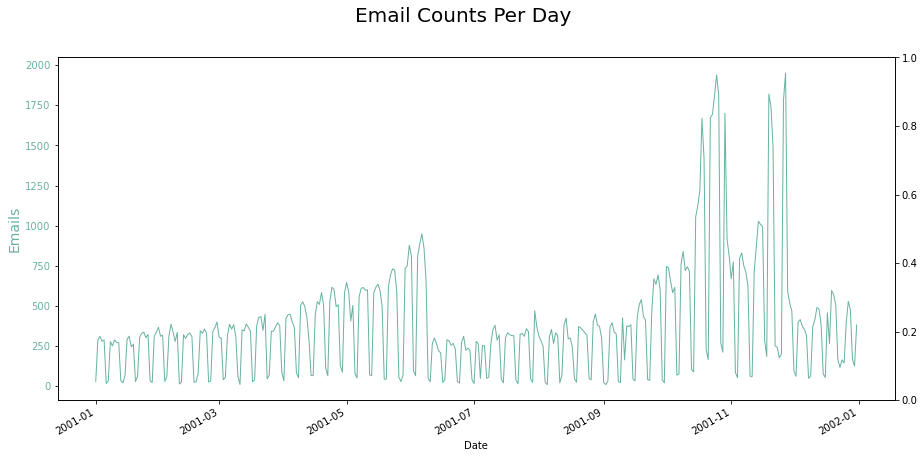

In [74]:
COLOR_VOLUME = "#69b3a2"


fig, ax1 = plt.subplots(figsize=(15, 7))
ax2 = ax1.twinx()

ax1.plot(emails_df[0], emails_df[1], color=COLOR_VOLUME, lw=1)


ax1.set_xlabel("Date")
ax1.set_ylabel("Emails", color=COLOR_VOLUME, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_VOLUME)


fig.suptitle("Email Counts Per Day", fontsize=20)
fig.autofmt_xdate()